In [17]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [18]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/incident_impulse/raw/ii_all_refs.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_distance,scaled_impulse,reference
0,0.134641,297.658785,"(Department of Defense, 1969)"
1,0.175491,193.282746,"(Department of Defense, 1969)"
2,0.252596,91.554304,"(Department of Defense, 1969)"
3,0.375762,34.375288,"(Department of Defense, 1969)"
4,0.506293,22.693978,"(Department of Defense, 1969)"


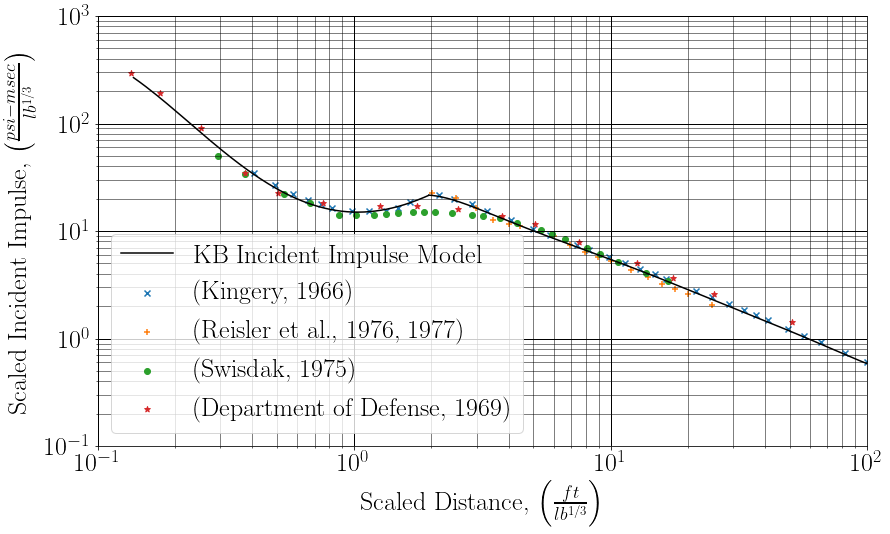

In [19]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
else: #surface
    T1 = np.arange(0.17,2.42,0.01)
    TL1 = np.log10(T1)
    U1 = (0.832468843425 + 3.0760329666*TL1)   
    Y1 = 10**(1.57159240621 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(2.41,130.1,0.01)
    TL2 = np.log10(T2)
    U2 = (-2.91358616806 + 2.40697745406*TL2)
    Y2 = 10**(0.719852655584 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)

fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'(Kingery, 1966)': 'x', '(Reisler et al., 1976, 1977)': '+', '(Swisdak, 1975)': 'o', '(Department of Defense, 1969)': '*'}
for kind in mkr_dict:
    d = shot_data[shot_data.reference==kind]
    plt.scatter(d.scaled_distance, d.scaled_impulse,  
                marker = mkr_dict[kind], label=kind)
f = 0.81

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,1000)
plt.xlim(0.1,100)
plt.loglog(T1*f,Y1*f,color='black', label="KB Incident Impulse Model");
plt.loglog(T2*f,Y2*f,color='black');
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{psi-msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
plt.legend()
plt.tight_layout()
#ax.annotate('local max', xy=(2.37, 25), xytext=(4.1, 150),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

data_path = "/Users/skmcneill/Documents/github/phd_comprehensive/figures/"
file_name = "fig_ii_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

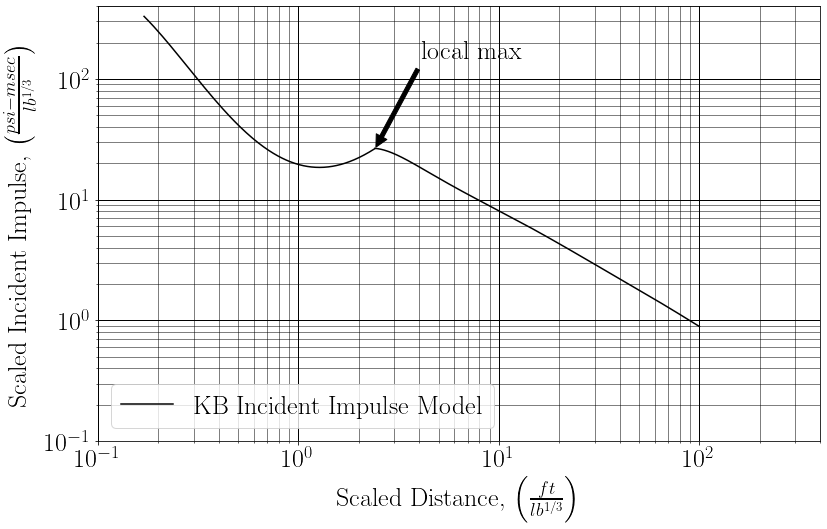

In [20]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
else: #surface
    T1 = np.arange(0.17,2.42,0.01)
    TL1 = np.log10(T1)
    U1 = (0.832468843425 + 3.0760329666*TL1)   
    Y1 = 10**(1.57159240621 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(2.41,100.1,0.01)
    TL2 = np.log10(T2)
    U2 = (-2.91358616806 + 2.40697745406*TL2)
    Y2 = 10**(0.719852655584 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)

fig, ax = plt.subplots(figsize=(w, h))

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,400)
plt.xlim(0.1,400)
plt.loglog(T1,Y1,color='black', label="KB Incident Impulse Model");
plt.loglog(T2,Y2,color='black');
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{psi-msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
plt.legend(loc=3)

ax.annotate('local max', xy=(2.37, 25), xytext=(4.1, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

data_path = "5_reports/figures"
file_name = "fig_ii_no_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

In [26]:
# 5 tn Data
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/incident_impulse/raw/data_5tn_ii.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_5tn = pd.read_csv(filePath)
# 20 tn Data
data_path = "2_data/incident_impulse/raw/data_20tn_ii.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_20tn = pd.read_csv(filePath)
# 100 tn Data
data_path = "2_data/incident_impulse/raw/data_100tn_ii.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_100tn = pd.read_csv(filePath)
# 500 tn Data
data_path = "2_data/incident_impulse/raw/data_500tn_ii.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_500tn = pd.read_csv(filePath)

In [28]:
x_5tn = shot_data_5tn['scaled-distance_metric']
y_5tn = shot_data_5tn['scaled_ii_metric']

x_20tn = shot_data_20tn['scaled-distance_metric']
y_20tn = shot_data_20tn['scaled_ii_metric']

x_100tn = shot_data_100tn['scaled-distance_metric']
y_100tn = shot_data_100tn['scaled_ii_metric']

x_500tn = shot_data_500tn['scaled-distance_metric']
y_500tn = shot_data_500tn['scaled_ii_metric']

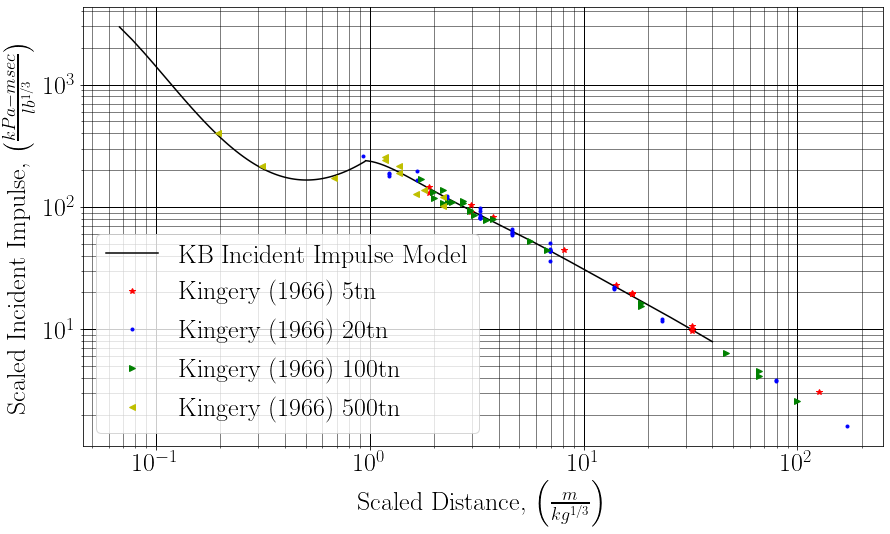

In [33]:
Blast = 'surface'

if Blast == 'freeair': # english
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
else: #surface metric
    T1 = np.arange(0.0674,0.956,0.01)
    TL1 = np.log10(T1)
    U1 = (2.06761908721 + 3.0760329666*TL1)   
    Y1 = 10**(2.52455620925 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(0.955,40.01,0.01)
    TL2 = np.log10(T2)
    U2 = (-1.94708846747 + 2.40697745406*TL2)
    Y2 = 10**(1.67281645863 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)

fig, ax = plt.subplots(figsize=(w, h))

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
#plt.ylim(0.1,1000)
#plt.xlim(0.1,100)
plt.loglog(T1,Y1,color='black', label="KB Incident Impulse Model");
plt.loglog(T2,Y2,color='black');
# 5 ton
plt.loglog(x_5tn,y_5tn,'r*',label='Kingery (1966) 5tn')
# 20 ton
plt.loglog(x_20tn,y_20tn,'b.',label='Kingery (1966) 20tn')
# 100 ton
plt.loglog(x_100tn,y_100tn,'g>',label='Kingery (1966) 100tn')
# 500 ton
plt.loglog(x_500tn,y_500tn,'y<',label='Kingery (1966) 500tn')
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{kPa-msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{m}{kg^{1/3}}\right)$')
plt.legend()
plt.tight_layout()

data_path = "/Users/skmcneill/Documents/github/comprehensive/5_reports/figures/"
file_name = "fig_ii_tn_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()